<a href="https://colab.research.google.com/github/smayone/PROJECTED-PROJECTS/blob/master/Capstone3_Broadband.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initializing tools with importing 
Pandas, Numpy, Seaborn, Scipy and Matplotlib.

In [1]:
import pandas as pd
from scipy import stats
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

from pandas.plotting import scatter_matrix
from pandas.plotting import bootstrap_plot
from pandas.plotting import autocorrelation_plot


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Pull down of raw data from Data.gov: broadband adoption


In [2]:
url = 'https://raw.githubusercontent.com/smayone/smayone.github.io/master/Broadband_Adoption_and_Computer_Use.csv'
broad = pd.read_csv(url)

# Identifying dataset

In [3]:
broad.shape

(348, 340)

In [4]:
broad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Columns: 340 entries, dataset to WYCountSE
dtypes: float64(186), int64(150), object(4)
memory usage: 924.5+ KB


In [5]:
broad.head(348)

,dataset,Paths_to_Internet,description,universe,usProp,usPropSE,usCount,usCountSE,age314Prop,age314PropSE,age314Count,age314CountSE,age1524Prop,age1524PropSE,age1524Count,age1524CountSE,age2544Prop,age2544PropSE,age2544Count,age2544CountSE,age4564Prop,age4564PropSE,age4564Count,age4564CountSE,age65pProp,age65pPropSE,age65pCount,age65pCountSE,workEmployedProp,workEmployedPropSE,workEmployedCount,workEmployedCountSE,workUnemployedProp,workUnemployedPropSE,workUnemployedCount,workUnemployedCountSE,workNILFProp,workNILFPropSE,workNILFCount,workNILFCountSE,...,SDProp,SDPropSE,SDCount,SDCountSE,TNProp,TNPropSE,TNCount,TNCountSE,TXProp,TXPropSE,TXCount,TXCountSE,UTProp,UTPropSE,UTCount,UTCountSE,VTProp,VTPropSE,VTCount,VTCountSE,VAProp,VAPropSE,VACount,VACountSE,WAProp,WAPropSE,WACount,WACountSE,WVProp,WVPropSE,WVCount,WVCountSE,WIProp,WIPropSE,WICount,WICountSE,WYProp,WYPropSE,WYCount,WYCountSE
0,11/1/94 0:00,isHouseholder,Household Reference Person in Universe: Non-In...,NaN,1.000000,0.000000,99708018,233531,NaN,NaN,NaN,NaN,1.000000,0.000000,5573616,119206,1.000000,0.000000,43123860,269529,1.000000,0.000000,29830455,229180,1.000000,0.000000,21180087,196246,1.000000,0.000000,65545071,281788,1.000000,0.000000,2939228,84396,1.000000,0.000000,30486580,227893,...,1.000000,0.000000,271275,10676,1.000000,0.000000,2072162,81868,1.000000,0.000000,6784229,140299,1.000000,0.000000,605439,25452,1.000000,0.000000,226026,10819,1.000000,0.000000,2411191,81512,1.000000,0.000000,2201373,88238,1.000000,0.000000,752405,29310,1.000000,0.000000,1916700,70578,1.000000,0.000000,183476,7697
1,11/1/94 0:00,isPerson,Person in Universe: Ages 3+ Not Active-Duty Mi...,NaN,1.000000,0.000000,248509799,723058,1.0,0.0,47170805.0,431104.0,1.000000,0.000000,36254422,360528,1.000000,0.000000,83005904,441994,1.000000,0.000000,50934354,362091,1.000000,0.000000,31144313,285840,1.000000,0.000000,125490400,504535,1.000000,0.000000,7179758,143172,1.000000,0.000000,68668835,393838,...,1.000000,0.000000,667201,14932,1.000000,0.000000,4895851,104056,1.000000,0.000000,17789235,234245,1.000000,0.000000,1791096,44620,1.000000,0.000000,560296,15154,1.000000,0.000000,6238561,155582,1.000000,0.000000,5103906,118284,1.000000,0.000000,1770883,45537,1.000000,0.000000,4984995,107785,1.000000,0.000000,448994,10524
2,11/1/94 0:00,computerAtHome,"Anyone in Household Uses a Desktop, Laptop, or...",isHouseholder,0.242794,0.002097,24208471,216845,NaN,NaN,NaN,NaN,0.183342,0.008468,1021876,52096,0.302369,0.003458,13039306,168561,0.285785,0.003980,8525086,135782,0.076591,0.002773,1622202,60829,0.309758,0.002805,20303084,202794,0.176269,0.010999,518094,35491,0.099482,0.002586,3032861,82060,...,0.208368,0.016017,56525,4871,0.178998,0.015229,370913,34789,0.227992,0.008820,1546748,67650,0.386790,0.020535,234178,15786,0.308671,0.022512,69768,6180,0.306894,0.015668,739981,45156,0.309609,0.018628,681565,49244,0.161853,0.014178,121779,11590,0.242546,0.015910,464888,35003,0.296431,0.019261,54388,4207
3,11/1/94 0:00,isAdult,Person Ages 15+,isPerson,0.810185,0.001394,201338994,512792,0.0,0.0,0.0,0.0,1.000000,0.000000,36254422,360528,1.000000,0.000000,83005904,441994,1.000000,0.000000,50934354,362091,1.000000,0.000000,31144313,285840,1.000000,0.000000,125490400,504535,1.000000,0.000000,7179758,143172,1.000000,0.000000,68668835,393838,...,0.795224,0.011039,530574,10302,0.835890,0.010952,4092392,76874,0.783998,0.006288,13946731,162675,0.759279,0.011894,1359943,28446,0.809655,0.013615,453647,9760,0.809601,0.009606,5050748,114306,0.804035,0.011291,4103718,85470,0.832422,0.010740,1474123,34048,0.789043,0.011042,3933376,71314,0.801415,0.011327,359831,7207
4,10/1/97 0:00,isHouseholder,Household Reference Person in Universe: Non-In...,NaN,1.000000,0.000000,102741556,223547,NaN,NaN,NaN,NaN,1.000000,0.000000,5670471,128018,1.000000,0.000000,43481519,277700,1.000000,0.000000,32280721,249425,1.000000,0.000000,21308845,207527,1.000000,0.000000,68293121,289581,1.000000,0.000000,2487795,82811,1.000000,0.000000,31406186,2

In [6]:
broad.dtypes

dataset               object
Paths_to_Internet     object
description           object
universe              object
usProp               float64
                      ...   
WICountSE              int64
WYProp               float64
WYPropSE             float64
WYCount                int64
WYCountSE              int64
Length: 340, dtype: object

In [7]:
broad.nunique()

dataset               14
Paths_to_Internet     71
description           71
universe               8
usProp               321
                    ... 
WICountSE            347
WYProp               319
WYPropSE             305
WYCount              346
WYCountSE            346
Length: 340, dtype: int64

In [8]:
broad.isna()

,dataset,Paths_to_Internet,description,universe,usProp,usPropSE,usCount,usCountSE,age314Prop,age314PropSE,age314Count,age314CountSE,age1524Prop,age1524PropSE,age1524Count,age1524CountSE,age2544Prop,age2544PropSE,age2544Count,age2544CountSE,age4564Prop,age4564PropSE,age4564Count,age4564CountSE,age65pProp,age65pPropSE,age65pCount,age65pCountSE,workEmployedProp,workEmployedPropSE,workEmployedCount,workEmployedCountSE,workUnemployedProp,workUnemployedPropSE,workUnemployedCount,workUnemployedCountSE,workNILFProp,workNILFPropSE,workNILFCount,workNILFCountSE,...,SDProp,SDPropSE,SDCount,SDCountSE,TNProp,TNPropSE,TNCount,TNCountSE,TXProp,TXPropSE,TXCount,TXCountSE,UTProp,UTPropSE,UTCount,UTCountSE,VTProp,VTPropSE,VTCount,VTCountSE,VAProp,VAPropSE,VACount,VACountSE,WAProp,WAPropSE,WACount,WACountSE,WVProp,WVPropSE,WVCount,WVCountSE,WIProp,WIPropSE,WICount,WICountSE,WYProp,WYPropSE,WYCount,WYCountSE
0,False,False,False,True,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [9]:
broad.isna().sum()

dataset               0
Paths_to_Internet     0
description           0
universe             28
usProp                0
                     ..
WICountSE             0
WYProp                0
WYPropSE              0
WYCount               0
WYCountSE             0
Length: 340, dtype: int64

In [10]:
broad.describe()

,usProp,usPropSE,usCount,usCountSE,age314Prop,age314PropSE,age314Count,age314CountSE,age1524Prop,age1524PropSE,age1524Count,age1524CountSE,age2544Prop,age2544PropSE,age2544Count,age2544CountSE,age4564Prop,age4564PropSE,age4564Count,age4564CountSE,age65pProp,age65pPropSE,age65pCount,age65pCountSE,workEmployedProp,workEmployedPropSE,workEmployedCount,workEmployedCountSE,workUnemployedProp,workUnemployedPropSE,workUnemployedCount,workUnemployedCountSE,workNILFProp,workNILFPropSE,workNILFCount,workNILFCountSE,incomeU25Prop,incomeU25PropSE,incomeU25Count,incomeU25CountSE,...,SDProp,SDPropSE,SDCount,SDCountSE,TNProp,TNPropSE,TNCount,TNCountSE,TXProp,TXPropSE,TXCount,TXCountSE,UTProp,UTPropSE,UTCount,UTCountSE,VTProp,VTPropSE,VTCount,VTCountSE,VAProp,VAPropSE,VACount,VACountSE,WAProp,WAPropSE,WACount,WACountSE,WVProp,WVPropSE,WVCount,WVCountSE,WIProp,WIPropSE,WICount,WICountSE,WYProp,WYPropSE,WYCount,WYCountSE
count,348.000000,348.000000,3.480000e+02,348.000000,95.000000,95.000000,9.500000e+01,95.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02,348.000000,242.000000,242.000000,2.420000e+02,242.000000,...,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000
mean,0.436552,0.002072,7.817358e+07,361403.149425,0.343609,0.002780,1.684155e+07,192543.389474,0.464559,0.007499,1.121907e+07,143275.658046,0.476860,0.003433,2.783948e+07,210099.655172,0.445983,0.003175,2.425401e+07,193462.974138,0.368286,0.003697,1.026347e+07,125094.890805,0.474963,0.002618,4.881990e+07,314216.474138,0.445458,0.009831,2.815783e+06,88338.442529,0.395813,0.003095,2.185474e+07,222658.956897,0.356686,0.004411,1.366870e+07,243601.673554,...,0.429495,0.016273,205340.761494,10010.114943,0.421691,0.015167,1.549398e+06,67432.491379,0.430494,0.008558,6.032955e+06,141476.594828,0.458837,0.016974,7.051989e+05,30980.155172,0.445770,0.014609,171486.836207,6757.054598,0.447212,0.013251,2.054045e+06,74634.089080,0.462254,0.014363,1.873644e+06,69057.436782,0.410048,0.014776,4.413742e+05,20731.919540,0.443779,0.014047,1.520099e+06,57021.856322,0.443271,0.016204,147712.071839,6223.054598
std,0.326310,0.001155,7.841746e+07,236266.468190,0.335659,0.002329,1.640860e+07,142400.452092,0.344629,0.005793,1.373736e+07,115726.994599,0.346880,0.002312,2.591713e+07,131369.693896,0.342517,0.001942,2.313076e+07,116467.741000,0.343058,0.002340,1.138598e+07,81167.446105,0.347689,0.001742,4.551759e+07,186839.685834,0.341426,0.006645,3.218972e+06,66922.346606,0.334497,0.001923,2.423324e+07,148514.275926,0.296973,0.002227,1.498213e+07,182102.578685,...,0.326666,0.009867,206760.407270,9444.702710,0.320494,0.008643,1.573142e+06,53376.756466,0.318836,0.004628,6.145649e+06,109293.752051,0.334769,0.010495,7.138662e+05,27018.312500,0.335553,0.008204,168989.146201,5200.936954,0.331901,0.007719,2.030705e+06,59022.012466,0.335281,0.008778,1.802129e+06,54294.400890,0.324913,0.008652,4.657374e+05,18417.098387,0.333386,0.008350,1.502704e+06,44806.804717,0.329844,0.010073,145322.741050,4763.122752
min,0.002974,0.000000,1.111000e+05,17918.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.001387,0.000000,1.392100e+04,0.000000,0.002553,0.000000,4.785700e+04,0.000000,0.000554,0.000000,1.786300e+04,2.000000,0.003120,0.000000,4.906000e+04,11855.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.

# Any correlations?

In [11]:
broad.corr()

,usProp,usPropSE,usCount,usCountSE,age314Prop,age314PropSE,age314Count,age314CountSE,age1524Prop,age1524PropSE,age1524Count,age1524CountSE,age2544Prop,age2544PropSE,age2544Count,age2544CountSE,age4564Prop,age4564PropSE,age4564Count,age4564CountSE,age65pProp,age65pPropSE,age65pCount,age65pCountSE,workEmployedProp,workEmployedPropSE,workEmployedCount,workEmployedCountSE,workUnemployedProp,workUnemployedPropSE,workUnemployedCount,workUnemployedCountSE,workNILFProp,workNILFPropSE,workNILFCount,workNILFCountSE,incomeU25Prop,incomeU25PropSE,incomeU25Count,incomeU25CountSE,...,SDProp,SDPropSE,SDCount,SDCountSE,TNProp,TNPropSE,TNCount,TNCountSE,TXProp,TXPropSE,TXCount,TXCountSE,UTProp,UTPropSE,UTCount,UTCountSE,VTProp,VTPropSE,VTCount,VTCountSE,VAProp,VAPropSE,VACount,VACountSE,WAProp,WAPropSE,WACount,WACountSE,WVProp,WVPropSE,WVCount,WVCountSE,WIProp,WIPropSE,WICount,WICountSE,WYProp,WYPropSE,WYCount,WYCountSE
usProp,1.000000,-0.092146,0.792971,0.409203,0.604488,-0.399833,0.603596,0.192533,0.960938,-0.183044,0.594205,0.432418,0.977393,-0.230649,0.811348,0.523961,0.990316,-0.144447,0.848301,0.605137,0.919320,0.057280,0.835902,0.726393,0.984155,-0.233027,0.809549,0.640177,0.958410,-0.107118,0.701494,0.695726,0.961216,0.027815,0.790108,0.762674,0.958730,0.254494,0.787932,0.745138,...,0.994809,-0.028044,0.801562,0.431104,0.994421,-0.026222,0.800198,0.494395,0.995871,-0.068791,0.773792,0.467685,0.985334,-0.113603,0.739002,0.407972,0.991213,-0.119713,0.802113,0.499568,0.996409,-0.099008,0.786043,0.474544,0.989716,-0.156043,0.782447,0.445397,0.987011,0.021580,0.804009,0.495326,0.995992,-0.077851,0.797052,0.456438,0.992547,-0.084509,0.794925,0.473567
usPropSE,-0.092146,1.000000,-0.282218,0.175048,-0.331347,0.817706,-0.327801,0.118837,-0.122097,0.838781,-0.214646,0.008006,-0.092159,0.929044,-0.246183,0.074347,-0.106569,0.963966,-0.255467,0.119072,-0.145659,0.826059,-0.328650,0.070543,-0.092236,0.936315,-0.235127,0.040437,-0.112806,0.860070,-0.232364,-0.032496,-0.137413,0.881205,-0.310273,-0.011172,-0.013761,0.858593,-0.271862,-0.086663,...,-0.104035,0.890211,-0.289773,0.133115,-0.111730,0.906104,-0.297341,0.140730,-0.099773,0.969436,-0.278918,0.156872,-0.077250,0.913392,-0.238947,0.146380,-0.094376,0.934053,-0.273232,0.095285,-0.074252,0.955572,-0.263158,0.130014,-0.077322,0.926302,-0.243838,0.136445,-0.116803,0.862596,-0.322419,0.121846,-0.086132,0.930686,-0.271380,0.136740,-0.100453,0.897413,-0.266985,0.147939
usCount,0.792971,-0.282218,1.000000,0.578763,0.604127,-0.364758,0.604400,0.172207,0.831972,-0.474607,0.931633,0.621715,0.825966,-0.408239,0.980061,0.574035,0.804652,-0.349218,0.975919,0.625648,0.700002,-0.203499,0.901312,0.673374,0.826275,-0.406548,0.980339,0.790570,0.797218,-0.356837,0.894691,0.811670,0.764636,-0.249161,0.971088,0.869565,0.720860,-0.017218,0.947175,0.945947,...,0.788005,-0.180845,0.996811,0.488197,0.788939,-0.226304,0.997077,0.546231,0.784499,-0.263431,0.994764,0.553227,0.794337,-0.302637,0.984534,0.501064,0.800247,-0.296072,0.993622,0.539639,0.791599,-0.258614,0.997505,0.539144,0.802262,-0.306261,0.992172,0.496598,0.773926,-0.179226,0.986751,0.527548,0.801038,-0.249184,0.997385,0.512301,0.804723,-0.279837,0.996295,0.527296
usCountSE,0.409203,0.175048,0.578763,1.000000,0.226186,0.541348,0.224741,0.698789,0.455566,-0.221973,0.614759,0.887774,0.461340,-0.001397,0.615406,0.894437,0.391856,0.083530,0.529326,0.898618,0.224783,0.173191,0.323243,0.730973,0.457662,0.008014,0.612520,0.867968,0.391877,0.010116,0.493366,0.619920,0.306652,0.147844,0.448492,0.705251,0.197558,0.390016,0.273541,0.528622,...,0.391085,0.215083,0.561147,0.636831,0.381515,0.172341,0.543918,0.714710,0.392744,0.173368,0.562413,0.783804,0.454806,0.088143,0.625499,0.742890,0.422048,0.128146,0.594676,0.744464,0.431015,0.176771,0.600958,0.754908,0.457791,0.089708,0.629173,0.748695,0.352145,0.212382,0.514434,0.655982,0.432307,0.201187,0.598763,0.753156,0.424269,0.102732,0.594529,0.742384
age314Prop,0.604488,-0.331347,0.604127,0.226186,1.000000,0.023012,0.9998

In [12]:
broad['AZProp'].corr(broad['TXProp'])

0.9919859380876557

In [23]:
frame = pd.DataFrame(np.random.randn(1000, 5),
  columns=['Paths_to_Internet', 'sexFemaleProp', 'sexMaleProp', 'AZProp', 'TXProp'])
frame.iloc[::2] = np.nan
frame['sexFemaleProp'].corr(frame['sexMaleProp'])
frame['AZProp'].corr(frame['TXProp'], method='spearman')

-0.024202944811779245

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dc8545d68>,
      dtype=object)

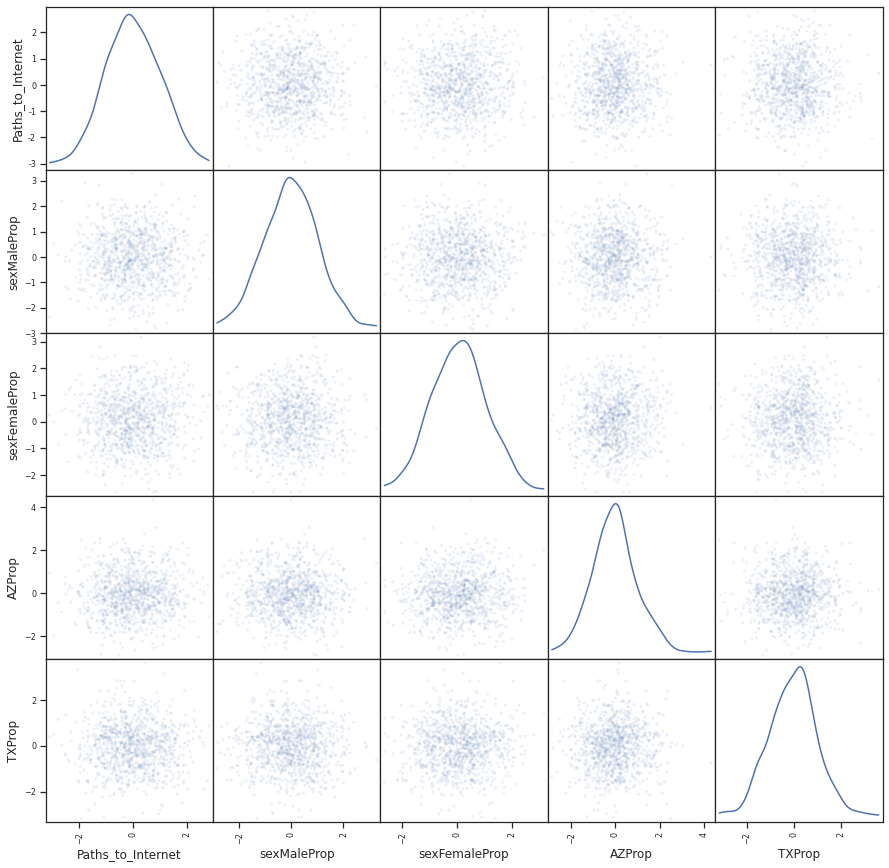

In [24]:
broad = pd.DataFrame(np.random.randn(1000, 5), columns=['Paths_to_Internet', 'sexMaleProp', 'sexFemaleProp', 'AZProp','TXProp'])

scatter_matrix(broad, alpha=0.10, figsize=(15, 15), diagonal='kde')